## Building Machine Learning Models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lg
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier as knc
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import GradientBoostingClassifier as gbc
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [3]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acs

In [4]:
df=pd.read_csv("model2.csv")

In [5]:
df.head()

,Unnamed: 0,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,58,0,200,13,5,1,33,4,5,4,17288,6,34,2,2,4,40,3,4,31,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,1,35,0,711,28,4,3,90,1,5,1,41000,6,47,4,4,3,1,1,4,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1
2,2,37,0,1077,16,5,3,142,2,3,2,28591,3,22,3,3,2,6,1,1,3,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,3,34,1,1199,10,2,2,197,2,1,4,22968,2,2,1,4,1,7,4,3,6,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,4,48,0,184,34,3,3,123,1,3,1,16527,1,14,2,4,2,17,6,2,11,6,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1


In [6]:
df.drop("Unnamed: 0",inplace=True,axis=1)

In [7]:
len(df[df['YearsAtCompany']==1])

86014

### Creating  feature "AttritionInAYear" using YearsAtCompany column ,to see whether an employee get attritioned within a year or not

In [8]:
l = []
for i in range(len(df['Attrition'])):
    if df['YearsAtCompany'][i]==1 and df['Attrition'][i]==1:
        l.append(df['YearsAtCompany'][i])
    else:
        l.append(0)

In [9]:
len(l)

546221

In [10]:
df['AttritionInAYear']=l

In [11]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,AttritionInAYear
0,58,0,200,13,5,1,33,4,5,4,17288,6,34,2,2,4,40,3,4,31,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
1,35,0,711,28,4,3,90,1,5,1,41000,6,47,4,4,3,1,1,4,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0
2,37,0,1077,16,5,3,142,2,3,2,28591,3,22,3,3,2,6,1,1,3,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,34,1,1199,10,2,2,197,2,1,4,22968,2,2,1,4,1,7,4,3,6,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,48,0,184,34,3,3,123,1,3,1,16527,1,14,2,4,2,17,6,2,11,6,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,20,0,1472,41,3,1,200,3,4,4,4627,8,11,1,1,1,2,4,2,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
546217,60,1,1290,9,5,3,176,4,3,1,25823,0,16,3,1,1,31,3,1,17,17,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
546218,51,0,1265,50,3,4,154,2,3,1,12158,0,2,3,3,4,15,2,2,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
546219,55,0,1298,33,5,1,142,1,3,3,19790,5,26,3,4,1,29,4,4,28,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [12]:
df["AttritionInAYear"].unique()

array([0, 1], dtype=int64)

In [13]:
#df.to_csv('att_in_a_year.csv')

In [23]:
df1=pd.read_csv('att_in_a_year.csv')

In [24]:
df1

,Unnamed: 0,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,AttritionInAYear
0,0,58,0,200,13,5,1,33,4,5,4,17288,6,34,2,2,4,40,3,4,31,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
1,1,35,0,711,28,4,3,90,1,5,1,41000,6,47,4,4,3,1,1,4,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0
2,2,37,0,1077,16,5,3,142,2,3,2,28591,3,22,3,3,2,6,1,1,3,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,3,34,1,1199,10,2,2,197,2,1,4,22968,2,2,1,4,1,7,4,3,6,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,4,48,0,184,34,3,3,123,1,3,1,16527,1,14,2,4,2,17,6,2,11,6,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546216,546216,20,0,1472,41,3,1,200,3,4,4,4627,8,11,1,1,1,2,4,2,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
546217,546217,60,1,1290,9,5,3,176,4,3,1,25823,0,16,3,1,1,31,3,1,17,17,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
546218,546218,51,0,1265,50,3,4,154,2,3,1,12158,0,2,3,3,4,15,2,2,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
546219,546219,55,0,1298,33,5,1,142,1,3,3,19790,5,26,3,4,1,29,4,4,28,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [25]:
df1.drop(["Unnamed: 0","Attrition"],axis=1,inplace=True)

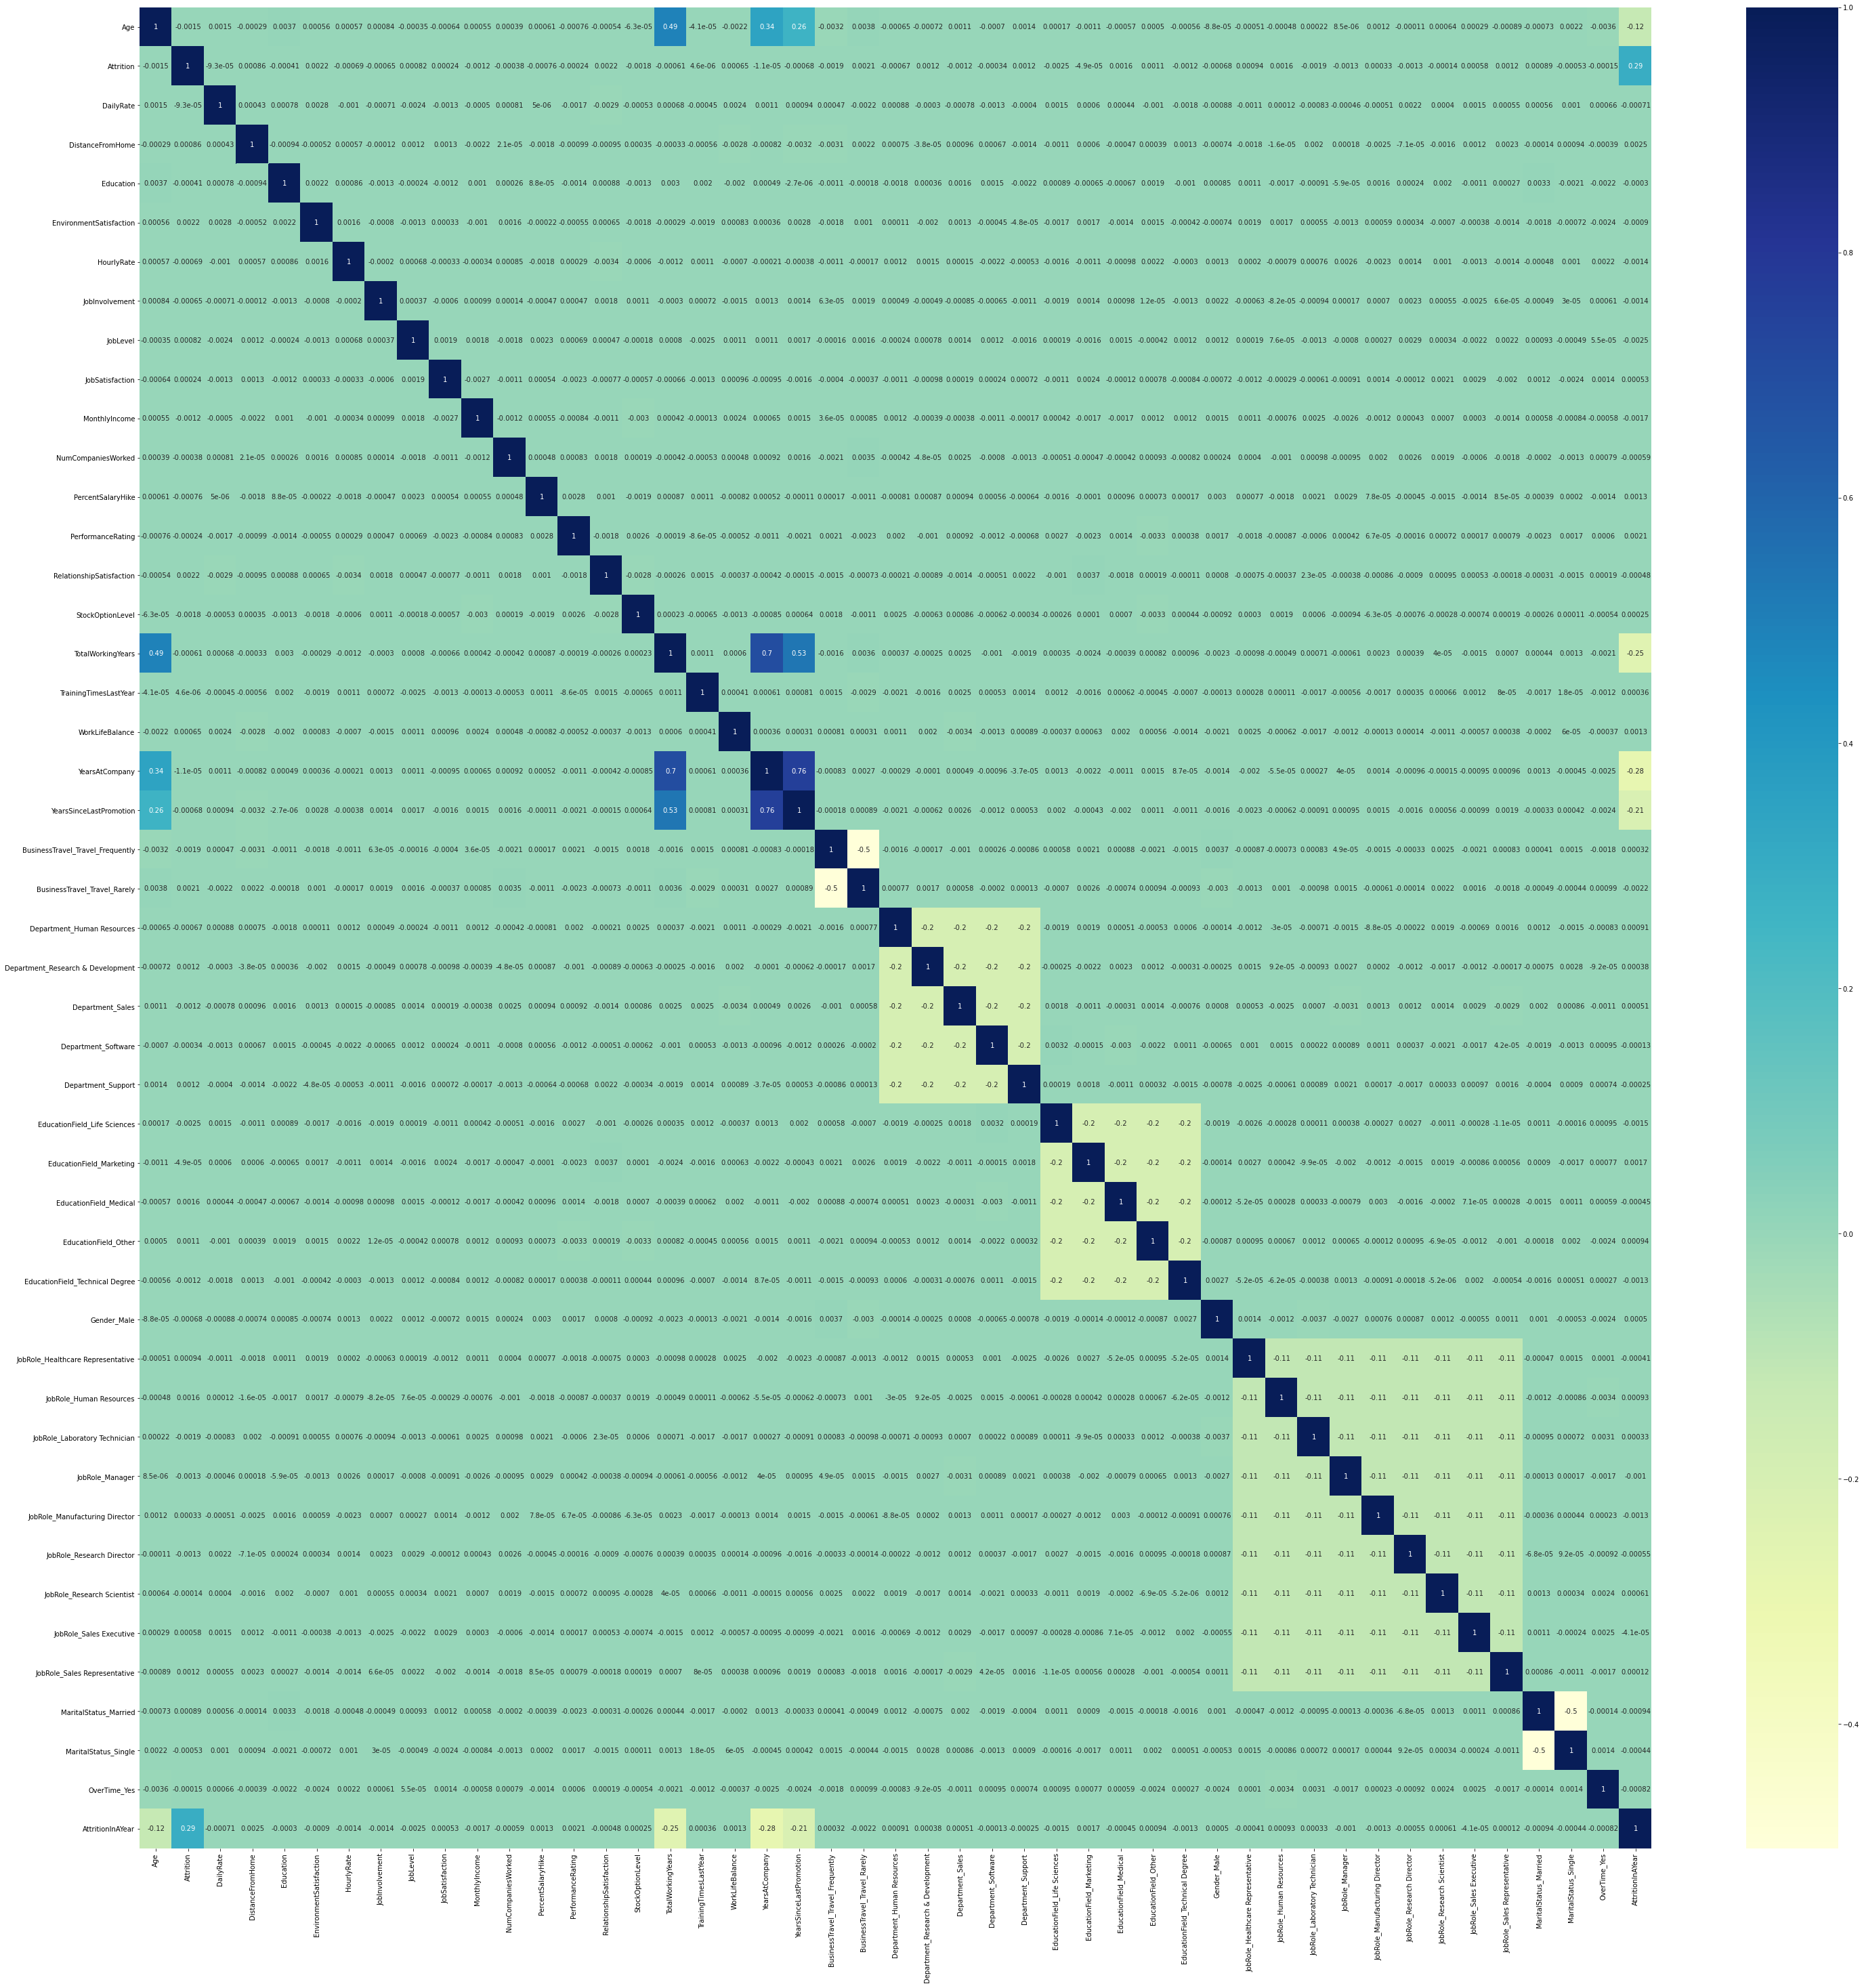

In [17]:
plt.figure(figsize=(50,50))
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [26]:
df1[df1["AttritionInAYear"]==1]

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Department_Software,Department_Support,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,AttritionInAYear
8,54,693,29,4,2,105,4,5,3,16467,3,20,3,1,3,13,2,3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1
15,20,715,13,4,1,134,2,3,1,33793,8,5,3,1,2,1,6,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
23,34,1397,48,4,3,63,2,4,4,39555,8,49,4,4,2,1,2,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1
32,44,306,30,3,4,143,4,2,1,27823,5,46,3,4,2,1,4,4,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
34,25,339,8,5,4,138,4,3,1,45823,1,10,1,3,4,2,3,4,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546152,58,1103,12,4,2,146,1,2,4,5984,0,29,2,4,1,4,3,2,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1
546156,54,158,40,1,4,118,1,3,2,11294,6,0,3,4,3,4,4,4,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
546166,48,1322,14,3,2,100,2,3,3,49953,2,48,4,3,2,16,2,3,1,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1
546170,23,1262,31,2,4,74,4,4,4,13521,4,4,2,4,4,4,5,3,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1


## Spliting the data for trianing  and testing.

In [27]:
x=df1.drop('AttritionInAYear',axis=1)
y=df1["AttritionInAYear"]

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

## Logistic Regression

In [20]:
model=lg().fit(x_train,y_train)
p=model.predict(x_test)
p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
print("Accuracy:",acs(y_test,p))
print("-----------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p))
print("-----------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p))

Accuracy: 0.9211039406837842
-----------------------------------------------------------
confusion_matrix:
 [[100626      0]
 [  8619      0]]
-----------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96    100626
           1       0.00      0.00      0.00      8619

    accuracy                           0.92    109245
   macro avg       0.46      0.50      0.48    109245
weighted avg       0.85      0.92      0.88    109245



## Decision tree

In [24]:
dtc1 = DecisionTreeClassifier()
dtc1.fit(x_train, y_train)
print("DecisionTreeClassifier")
p1=dtc1.predict(x_test)
p1

DecisionTreeClassifier


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
print("Accuracy:",acs(y_test,p1))
print("---------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,p1))
print("---------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,p1))

Accuracy: 0.9205181015149435
---------------------------------------------------------
confusion_matrix:
 [[96289  4337]
 [ 4346  4273]]
---------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96    100626
           1       0.50      0.50      0.50      8619

    accuracy                           0.92    109245
   macro avg       0.73      0.73      0.73    109245
weighted avg       0.92      0.92      0.92    109245



## Random Forest Classifier

In [63]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [64]:
print("Accuracy:",acs(y_test,y_pred))
print("------------------------------------------------------")
print("confusion_matrix:\n",cm(y_test,y_pred))
print("------------------------------------------------------")
print("classifiction_report:\n",cr(y_test,y_pred))

Accuracy: 0.9198407249759715
------------------------------------------------------
confusion_matrix:
 [[97511  3115]
 [ 5642  2977]]
------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96    100626
           1       0.49      0.35      0.40      8619

    accuracy                           0.92    109245
   macro avg       0.72      0.66      0.68    109245
weighted avg       0.91      0.92      0.91    109245



In [28]:
df["AttritionInAYear"].value_counts()

0    503279
1     42942
Name: AttritionInAYear, dtype: int64

Observation:It can be seen that it is in imbalanced form

## Handling Imbalanced Dataset

### Using Over Sampling Technique

In [30]:
from imblearn.over_sampling import SMOTE 
sm=SMOTE(random_state=2)
x_res,y_res=sm.fit_resample(x,y.ravel())

In [31]:
x_res.shape,y_res.shape

((1006558, 45), (1006558,))

In [43]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x_res,y_res,test_size = 0.2,random_state = 200)

## Logistic Regression

In [44]:
logistic=lg().fit(x2_train,y2_train)
p12=logistic.predict(x2_test)
p12

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [45]:
print("Accuracy:",acs(y2_test,p12))
print("-----------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p12))
print("-----------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p12))

Accuracy: 0.9128367906533142
-----------------------------------------------------------
confusion_matrix:
 [[88805 11860]
 [ 5687 94960]]
-----------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91    100665
           1       0.89      0.94      0.92    100647

    accuracy                           0.91    201312
   macro avg       0.91      0.91      0.91    201312
weighted avg       0.91      0.91      0.91    201312



## Decision tree

In [40]:
dtc2 = DecisionTreeClassifier()
dtc2.fit(x2_train, y2_train)
print("DecisionTreeClassifier")
p13=dtc2.predict(x2_test)
p13

DecisionTreeClassifier


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [41]:
print("Accuracy:",acs(y2_test,p13))
print("---------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p13))
print("---------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p13))

Accuracy: 0.9554472659354634
---------------------------------------------------------
confusion_matrix:
 [[96026  4639]
 [ 4330 96317]]
---------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    100665
           1       0.95      0.96      0.96    100647

    accuracy                           0.96    201312
   macro avg       0.96      0.96      0.96    201312
weighted avg       0.96      0.96      0.96    201312



## Random Forest Classifier

In [42]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x2_train, y2_train)  

#Predicting the test set result  
y_pred4= RFC.predict(x2_test)  

In [46]:
print("Accuracy:",acs(y2_test,y_pred4))
print("------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,y_pred4))
print("------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,y_pred4))

Accuracy: 0.9578912335081863
------------------------------------------------------
confusion_matrix:
 [[95853  4812]
 [ 3665 96982]]
------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    100665
           1       0.95      0.96      0.96    100647

    accuracy                           0.96    201312
   macro avg       0.96      0.96      0.96    201312
weighted avg       0.96      0.96      0.96    201312



## xgboost

In [48]:
xgb1_classifier = xgb.XGBClassifier()
xgb1_classifier.fit(x2_train,y2_train)

prediction1 = xgb1_classifier.predict(x2_test)

[11:22:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [49]:
print("Accuracy:",acs(y2_test,prediction1))
print("---------------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,prediction1))
print("---------------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,prediction1))

Accuracy: 0.9574839055793991
---------------------------------------------------------------
confusion_matrix:
 [[95778  4887]
 [ 3672 96975]]
---------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    100665
           1       0.95      0.96      0.96    100647

    accuracy                           0.96    201312
   macro avg       0.96      0.96      0.96    201312
weighted avg       0.96      0.96      0.96    201312



## Gradient Boosting Classifier

In [54]:
model8=gbc().fit(x2_train,y2_train)
p8=model8.predict(x2_test)

In [80]:
print("Accuracy:",acs(y2_test,p8))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,p8))
print("------------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,p8))

Accuracy: 0.89497583978576
------------------------------------------------------------
confusion_matrix:
 [[6833 1804]
 [   0 8540]]
------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88      8637
           1       0.83      1.00      0.90      8540

    accuracy                           0.89     17177
   macro avg       0.91      0.90      0.89     17177
weighted avg       0.91      0.89      0.89     17177



## Light gbm

In [56]:
%%time

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(boosting_type='gbdt',
    num_leaves=5000,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=5000,
    subsample_for_bin=200000,
    objective='binary',
    
    min_child_samples=5000,

    reg_alpha=0.9,
    reg_lambda=0.9,
metric='binary_logloss', #metric for binary classification
    
    n_jobs=-1,
    silent=True,
    importance_type='',
    random_state=6)

lgbm.fit(x2_train, y2_train)
y_pred = lgbm.predict(x2_test)

Wall time: 1min 14s


In [81]:
print("Accuracy:",acs(y2_test,y_pred))
print("------------------------------------------------------------")
print("confusion_matrix:\n",cm(y2_test,y_pred))
print("------------------------------------------------------------")
print("classifiction_report:\n",cr(y2_test,y_pred))

Accuracy: 0.8776270594399488
------------------------------------------------------------
confusion_matrix:
 [[6963 1674]
 [ 428 8112]]
------------------------------------------------------------
classifiction_report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      8637
           1       0.83      0.95      0.89      8540

    accuracy                           0.88     17177
   macro avg       0.89      0.88      0.88     17177
weighted avg       0.89      0.88      0.88     17177



### As Random forest classifier got the better accuracy so we are using this model for deployement.

In [31]:
import pickle
pickle_out = open('classifier.pkl',"wb")
pickle.dump(classifier,pickle_out)
pickle_out.close()